#📌 Extracción

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://github.com/alura-cursos/challenge2-data-science-LATAM/raw/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
print("Primeras filas del DataFrame:")
display(df.head())

Primeras filas del DataFrame:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Verificar información general del DataFrame
print("Información del DataFrame:")
df.info()

# Verificar valores ausentes
print("\nValores ausentes por columna:")
print(df.isnull().sum())

# Aplanar columnas anidadas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Concatenar los dataframes aplanados con el dataframe original
df = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)


# Verificar duplicados después de aplanar
print("\nNúmero de filas duplicadas después de aplanar:")
print(df.duplicated().sum())

# Explorar columnas para identificar inconsistencias (ejemplo para la columna 'Churn')
print("\nValores únicos en la columna 'Churn':")
print(df['Churn'].unique())

# Puedes repetir la exploración de valores únicos para otras columnas relevantes
# print("\nValores únicos en la columna 'otra_columna':")
# print(df['otra_columna'].unique())

# Ahora que las columnas anidadas han sido aplanadas, se pueden realizar
# verificaciones más detalladas en las columnas individuales.

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Valores ausentes por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Número de filas duplicadas después de aplanar:
0

Valores únicos en la columna 'Churn':
['No' 'Yes' '']


In [4]:
# Reemplazar los valores vacíos en la columna 'Churn' por NaN
df['Churn'] = df['Churn'].replace('', pd.NA)

# Eliminar filas con valores NaN en la columna 'Churn'
df.dropna(subset=['Churn'], inplace=True)

# Verificar los valores únicos en la columna 'Churn' después de la limpieza
print("Valores únicos en la columna 'Churn' después de la limpieza:")
print(df['Churn'].unique())

# Verificar la cantidad de filas después de eliminar los valores vacíos
print("\nNúmero de filas después de la limpieza de la columna 'Churn':")
print(df.shape[0])

Valores únicos en la columna 'Churn' después de la limpieza:
['No' 'Yes']

Número de filas después de la limpieza de la columna 'Churn':
7043


In [5]:
# Crear la columna 'Cuentas_Diarias' a partir de 'Charges.Monthly'
# Suponemos un promedio de 30 días por mes para el cálculo diario
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30

# Mostrar las primeras filas con la nueva columna
print("Primeras filas del DataFrame con la nueva columna 'Cuentas_Diarias':")
display(df[['Charges.Monthly', 'Cuentas_Diarias']].head())

Primeras filas del DataFrame con la nueva columna 'Cuentas_Diarias':


,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


#🔧 Transformación

In [6]:
# Renombrar columnas para que sean más comprensibles
df.rename(columns={
    'customerID': 'ID_Cliente',
    'gender': 'Genero',
    'SeniorCitizen': 'Ciudadano_Mayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Antiguedad',
    'PhoneService': 'Servicio_Telefonico',
    'MultipleLines': 'Multiples_Lineas',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Copia_Seguridad_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Facturacion_Sin_Papel',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Cargo_Mensual',
    'Charges.Total': 'Cargo_Total',
    'Churn': 'Abandono'
}, inplace=True)

print("Nombres de columnas después de la estandarización:")
print(df.columns)

# Opcional: Estandarizar los valores de algunas columnas si es necesario (ej. 'Yes'/'No' a 1/0)
# Esto puede hacerse columna por columna si aplica a más que solo 'Abandono'
# df['Abandono'] = df['Abandono'].map({'Yes': 1, 'No': 0})
# print("\nValores únicos en 'Abandono' después de mapeo (si se aplicó):")
# print(df['Abandono'].unique())

Nombres de columnas después de la estandarización:
Index(['ID_Cliente', 'Abandono', 'Genero', 'Ciudadano_Mayor', 'Pareja',
       'Dependientes', 'Antiguedad', 'Servicio_Telefonico', 'Multiples_Lineas',
       'Servicio_Internet', 'Seguridad_Online', 'Copia_Seguridad_Online',
       'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV',
       'Streaming_Peliculas', 'Contrato', 'Facturacion_Sin_Papel',
       'Metodo_Pago', 'Cargo_Mensual', 'Cargo_Total', 'Cuentas_Diarias'],
      dtype='object')


#📊 Carga y análisis

In [7]:
# Realizar análisis descriptivo de las columnas numéricas
print("Análisis descriptivo de los datos:")
display(df.describe())

# Opcional: Incluir columnas de tipo 'object' en el análisis descriptivo
# display(df.describe(include='all'))

Análisis descriptivo de los datos:


,Ciudadano_Mayor,Antiguedad,Cargo_Mensual,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2.158723
std,0.368612,24.559481,30.090047,1.003002
min,0.000000,0.000000,18.250000,0.608333
25%,0.000000,9.000000,35.500000,1.183333
50%,0.000000,29.000000,70.350000,2.345000
75%,0.000000,55.000000,89.850000,2.995000
max,1.000000,72.000000,118.750000,3.958333


/tmp/ipython-input-1703536772.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Abandono', data=df, palette='viridis')


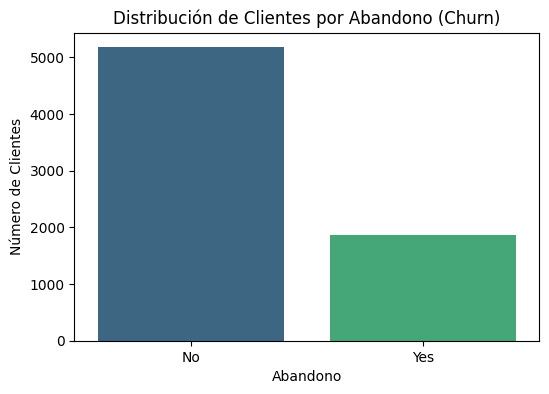

In [8]:
# Visualizar la distribución de la columna 'Abandono'
plt.figure(figsize=(6, 4))
sns.countplot(x='Abandono', data=df, palette='viridis')
plt.title('Distribución de Clientes por Abandono (Churn)')
plt.xlabel('Abandono')
plt.ylabel('Número de Clientes')
plt.show()

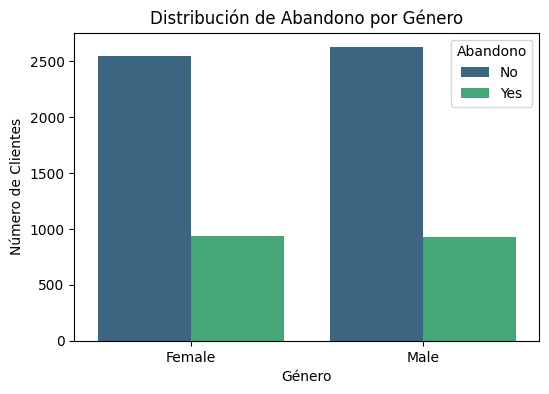

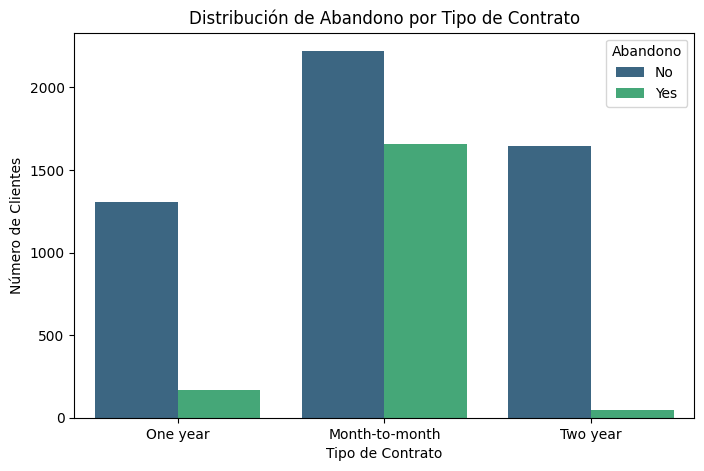

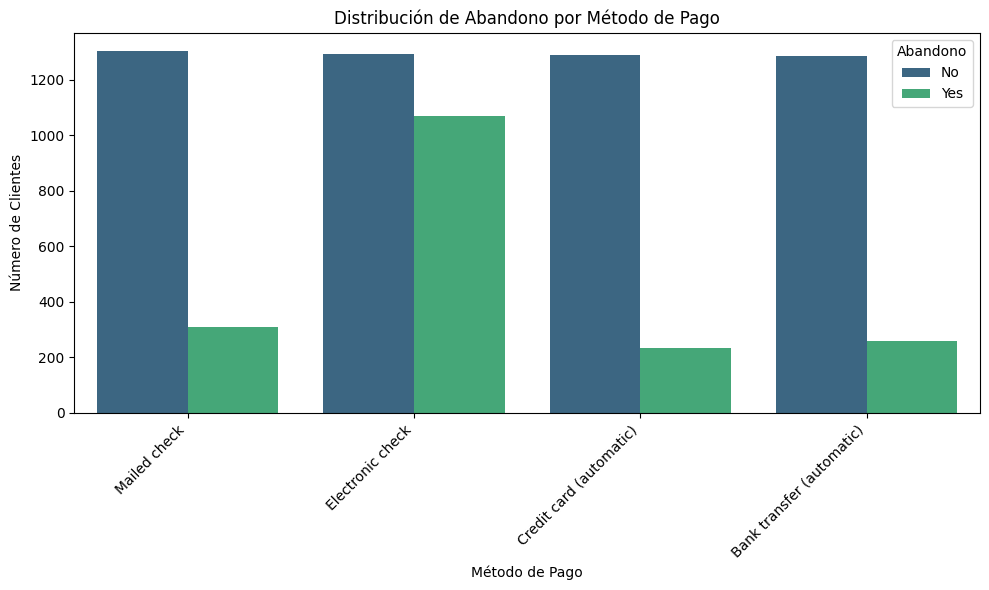

In [9]:
# Explorar la relación entre 'Abandono' y variables categóricas

# Gráfico de barras para Abandono vs. Genero
plt.figure(figsize=(6, 4))
sns.countplot(x='Genero', hue='Abandono', data=df, palette='viridis')
plt.title('Distribución de Abandono por Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.show()

# Gráfico de barras para Abandono vs. Contrato
plt.figure(figsize=(8, 5))
sns.countplot(x='Contrato', hue='Abandono', data=df, palette='viridis')
plt.title('Distribución de Abandono por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()

# Gráfico de barras para Abandono vs. Metodo_Pago
plt.figure(figsize=(10, 6))
sns.countplot(x='Metodo_Pago', hue='Abandono', data=df, palette='viridis')
plt.title('Distribución de Abandono por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x si son largas
plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.show()

# Puedes añadir más gráficos para otras columnas categóricas relevantes:
# 'Ciudadano_Mayor', 'Pareja', 'Dependientes', 'Servicio_Telefonico',
# 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online',
# 'Copia_Seguridad_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
# 'Streaming_TV', 'Streaming_Peliculas', 'Facturacion_Sin_Papel'

# Ejemplo: Gráfico de barras para Abandono vs. Servicio_Internet
# plt.figure(figsize=(8, 5))
# sns.countplot(x='Servicio_Internet', hue='Abandono', data=df, palette='viridis')
# plt.title('Distribución de Abandono por Servicio de Internet')
# plt.xlabel('Servicio de Internet')
# plt.ylabel('Número de Clientes')
# plt.show()

/tmp/ipython-input-1483246137.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Abandono', y='Antiguedad', data=df, palette='viridis')


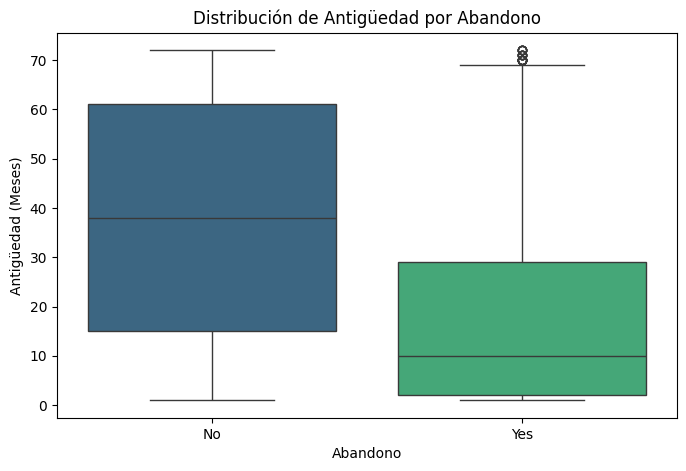

/tmp/ipython-input-1483246137.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Abandono', y='Cargo_Mensual', data=df, palette='viridis')


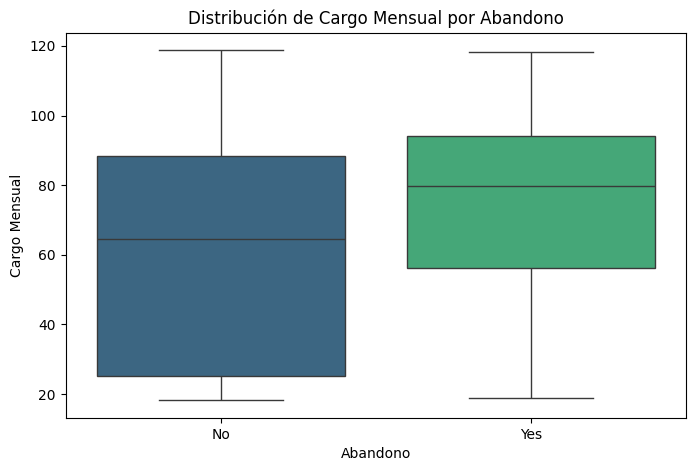

/tmp/ipython-input-1483246137.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Abandono', y='Cargo_Total', data=df, palette='viridis')


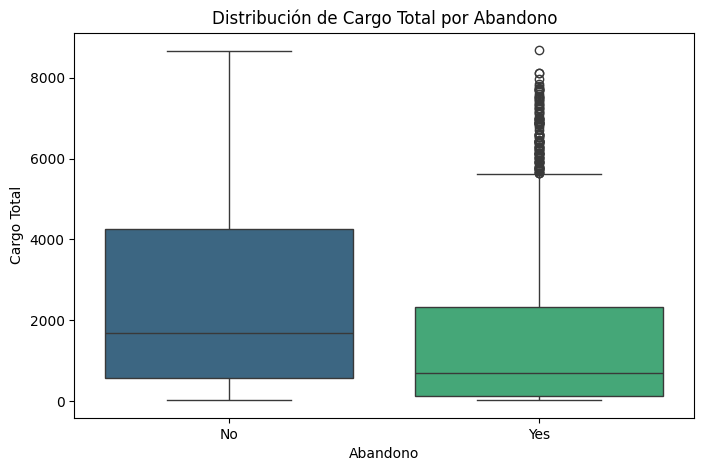

/tmp/ipython-input-1483246137.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Abandono', y='Cuentas_Diarias', data=df, palette='viridis')


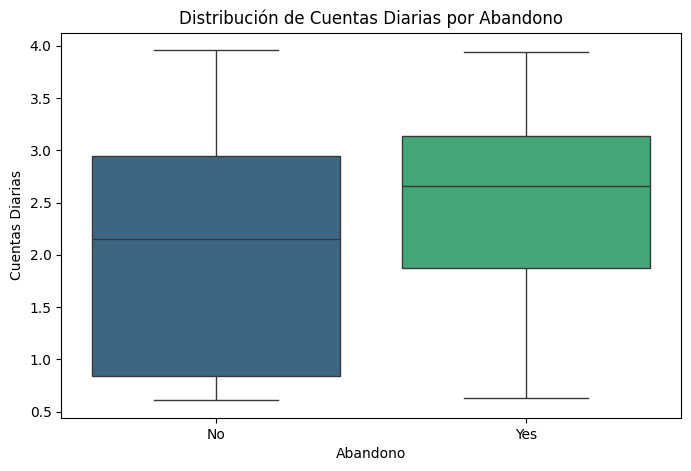

In [10]:
# Explorar la relación entre 'Abandono' y variables numéricas

# Asegurarse de que las columnas numéricas estén en el tipo de dato correcto
# La columna 'Cargo_Total' puede ser de tipo 'object' debido a valores no numéricos (ej. espacios en blanco)
# Convertirla a tipo numérico, manejando posibles errores
df['Cargo_Total'] = pd.to_numeric(df['Cargo_Total'], errors='coerce')

# Eliminar filas donde la conversión a numérico resultó en NaN en 'Cargo_Total'
df.dropna(subset=['Cargo_Total'], inplace=True)


# Gráfico de caja para Abandono vs. Antiguedad
plt.figure(figsize=(8, 5))
sns.boxplot(x='Abandono', y='Antiguedad', data=df, palette='viridis')
plt.title('Distribución de Antigüedad por Abandono')
plt.xlabel('Abandono')
plt.ylabel('Antigüedad (Meses)')
plt.show()

# Gráfico de caja para Abandono vs. Cargo_Mensual
plt.figure(figsize=(8, 5))
sns.boxplot(x='Abandono', y='Cargo_Mensual', data=df, palette='viridis')
plt.title('Distribución de Cargo Mensual por Abandono')
plt.xlabel('Abandono')
plt.ylabel('Cargo Mensual')
plt.show()

# Gráfico de caja para Abandono vs. Cargo_Total
plt.figure(figsize=(8, 5))
sns.boxplot(x='Abandono', y='Cargo_Total', data=df, palette='viridis')
plt.title('Distribución de Cargo Total por Abandono')
plt.xlabel('Abandono')
plt.ylabel('Cargo Total')
plt.show()

# Gráfico de caja para Abandono vs. Cuentas_Diarias
plt.figure(figsize=(8, 5))
sns.boxplot(x='Abandono', y='Cuentas_Diarias', data=df, palette='viridis')
plt.title('Distribución de Cuentas Diarias por Abandono')
plt.xlabel('Abandono')
plt.ylabel('Cuentas Diarias')
plt.show()

#📄Informe final

# 📄 Informe Final del Análisis de Abandono de Clientes (Churn)

## Introducción

El objetivo de este proyecto fue analizar el comportamiento de los clientes de TelecomX para comprender los factores que contribuyen al abandono del servicio (Churn). La evasión de clientes es un desafío crítico para las empresas, ya que retener a los clientes existentes suele ser más rentable que adquirir nuevos. Mediante el análisis de datos, buscamos identificar patrones y variables clave que puedan ayudar a predecir y reducir la tasa de abandono.

## Limpieza y Tratamiento de Datos

El proceso de análisis comenzó con la carga de los datos desde la URL proporcionada. Se utilizó la librería `pandas` para leer el archivo JSON y convertirlo en un DataFrame.

Durante la fase de limpieza y tratamiento, se realizaron los siguientes pasos:

-   Se verificó la información general del DataFrame (`df.info()`) para entender la estructura y los tipos de datos.
-   Se identificaron y manejaron las columnas anidadas (`customer`, `phone`, `internet`, `account`) aplanándolas con `pd.json_normalize()` y concatenándolas al DataFrame principal.
-   Se verificaron y eliminaron filas duplicadas después de aplanar los datos.
-   Se exploraron los valores únicos en la columna objetivo 'Churn', identificando la presencia de valores vacíos ('').
-   Se limpió la columna 'Churn' reemplazando los valores vacíos por `pd.NA` y eliminando las filas correspondientes (`df.dropna()`).
-   Se creó la nueva columna 'Cuentas_Diarias' dividiendo el 'Cargo_Mensual' por 30 para obtener una estimación del cargo diario.
-   Se estandarizaron los nombres de las columnas traduciéndolos al español para mejorar la comprensibilidad.
-   Se convirtió la columna 'Cargo_Total' a tipo numérico, manejando posibles errores (`pd.to_numeric(errors='coerce')`) y eliminando las filas donde la conversión resultó en NaN.

## Análisis Exploratorio de Datos

Se llevó a cabo un análisis exploratorio para entender las características de los clientes y su relación con el abandono.

-   **Análisis Descriptivo:** Se calcularon estadísticas descriptivas (`df.describe()`) para las columnas numéricas ('Ciudadano_Mayor', 'Antiguedad', 'Cargo_Mensual', 'Cuentas_Diarias', 'Cargo_Total') para obtener un resumen de su distribución central y dispersión.
-   **Distribución de Abandono:** Se visualizó la distribución de la columna 'Abandono' utilizando un gráfico de barras, mostrando el desbalance entre clientes que abandonan y los que no.
-   **Relación con Variables Categóricas:** Se exploró la relación entre 'Abandono' y variables categóricas clave mediante gráficos de barras (`seaborn.countplot()`):
    -   **Género:** Se visualizó la distribución de abandono por género.
    -   **Contrato:** Se analizó la tasa de abandono según el tipo de contrato (Month-to-month, One year, Two year), observando que los contratos mes a mes tienen una mayor tasa de abandono.
    -   **Método de Pago:** Se examinó la distribución de abandono por método de pago, identificando que los pagos electrónicos parecen estar asociados con una mayor tasa de abandono.
    -   (Se pueden añadir visualizaciones para otras variables categóricas exploradas).
-   **Relación con Variables Numéricas:** Se analizó la distribución de variables numéricas en relación con el abandono utilizando gráficos de caja (`seaborn.boxplot()`):
    -   **Antigüedad:** Se observó que los clientes que abandonan tienden a tener una menor antigüedad en el servicio.
    -   **Cargo Mensual:** Se visualizó la distribución del cargo mensual por grupo de abandono.
    -   **Cargo Total:** Se examinó la distribución del cargo total, notando que los clientes que abandonan suelen tener un cargo total menor, lo cual es coherente con su menor antigüedad.
    -   **Cuentas Diarias:** Se visualizó la distribución de las cuentas diarias por grupo de abandono.

## Conclusiones e Insights

Basado en el análisis exploratorio, se pueden extraer los siguientes insights clave sobre los factores que influyen en el abandono de clientes en TelecomX:

-   **Antigüedad:** Los clientes con menor antigüedad son significativamente más propensos a abandonar el servicio. Esto sugiere que los primeros meses son críticos para la retención.
-   **Tipo de Contrato:** Los clientes con contratos mes a mes tienen una tasa de abandono considerablemente más alta en comparación con aquellos con contratos de uno o dos años. Los contratos a largo plazo parecen fomentar la lealtad.
-   **Método de Pago:** El método de pago electrónico parece estar asociado con una mayor probabilidad de abandono.
-   **Cargos:** Los clientes que abandonan tienden a tener cargos mensuales y totales más bajos, lo cual está en línea con su menor antigüedad.

Estos hallazgos sugieren que el abandono no está distribuido uniformemente entre la base de clientes y está influenciado por la antigüedad, el tipo de contrato y el método de pago, entre otros factores.

## Recomendaciones

Para abordar el problema del abandono de clientes, se sugieren las siguientes recomendaciones estratégicas basadas en los insights obtenidos:

-   **Programas de Onboarding Mejorados:** Implementar programas de bienvenida y soporte intensivo durante los primeros meses para los nuevos clientes, dada la mayor tasa de abandono en este período.
-   **Incentivos para Contratos a Largo Plazo:** Ofrecer descuentos o beneficios atractivos para motivar a los clientes a optar por contratos de uno o dos años, reduciendo así la flexibilidad del abandono mes a mes.
-   **Análisis Detallado del Método de Pago Electrónico:** Investigar las razones detrás de la mayor tasa de abandono asociada con los pagos electrónicos. Podría haber problemas con la plataforma, la comunicación de facturación, o ser un indicador de un tipo de cliente más propenso a cambiar de proveedor.
-   **Estrategias de Retención Segmentadas:** Desarrollar campañas de retención dirigidas específicamente a los segmentos de clientes identificados como de alto riesgo (baja antigüedad, contrato mes a mes, pago electrónico).
-   **Monitoreo Continuo:** Establecer un sistema de monitoreo continuo de las métricas clave de abandono y realizar análisis periódicos para detectar cambios en los patrones de comportamiento del cliente.

Este informe proporciona una base para comprender el problema del abandono de clientes en TelecomX. Un análisis más profundo, incluyendo la construcción de modelos predictivos, podría ofrecer una capacidad aún mayor para identificar clientes en riesgo y tomar medidas proactivas.